<a href="https://colab.research.google.com/github/s0fm4v/Double-slit-Calculator/blob/main/DoubleSlitCalc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter
from google.colab import files
import sys

Please select which variable you would like to calculate: distance from light source to screen, slit separation, wavelength of light or fringe spacing? slit separation
Calculate through image or enter values? 1/2: 1


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Saving interference.jpg to interference.jpg
Please enter screen width in meters: 2
delta x img nan
Create a 'Double-Slit Interference Pattern' graph? Y/N: Y


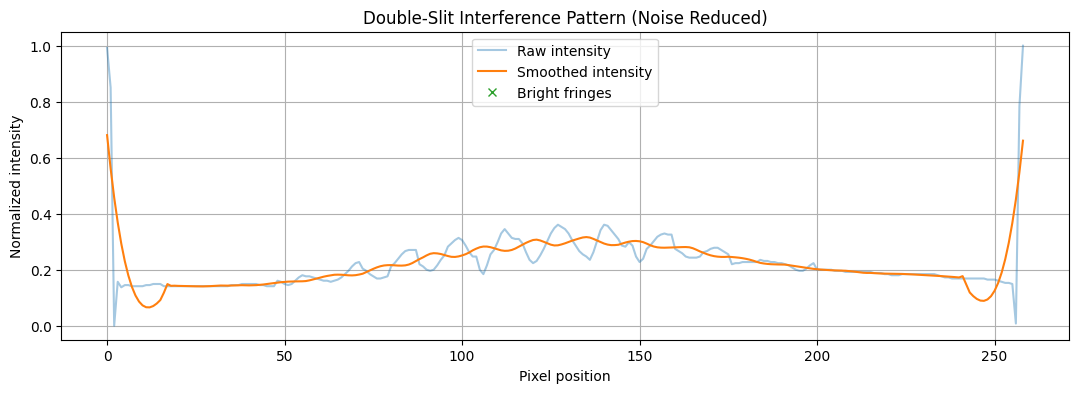

In [4]:
metabliti = input("Please select which variable you would like to calculate: distance from light source to screen, slit separation, wavelength of light or fringe spacing? ")

intensity = intensity_smooth = peaks = None

if metabliti == "slit separation":
    answer = int(input("Calculate through image or enter values? 1/2: "))
    if answer == 1:
        upload_file = files.upload()
        filename = list(upload_file.keys())[0]

        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        row = img.shape[0] // 2
        intensity = img[row, :].astype(float)

        max_val = np.max(intensity)
        intensity /= max_val

        w = min(31, len(intensity) // 2 * 2 + 1)
        intensity_smooth = savgol_filter(intensity, window_length=w, polyorder=3)

        peaks, properties = find_peaks(intensity_smooth, height=0.4, distance=30, prominence=0.1)

        fringe_spacings_px = np.diff(peaks[1:-1])
        delta_x_px = np.mean(fringe_spacings_px)

        screen_width_m = float(input("Please enter screen width in meters: "))
        screen_width_px = img.shape[1]

        meters_per_pixel = screen_width_m / screen_width_px
        delta_x_m = delta_x_px * meters_per_pixel
        print("delta x img", delta_x_m)

    elif answer == 2:
        wavelength_lambda = float(input("Enter wavelength λ in meters: "))
        slit_distance = float(input("Enter the distance between the slits in meters: "))
        screen_distance = float(input("Enter the distance from slits to screen in meters: "))
        delta_x = (wavelength_lambda * screen_distance) / slit_distance
        print("delta x", delta_x)

elif metabliti == "wavelength of light":
    slit_distance = float(input("Enter the distance between the slits in meters: "))
    screen_distance = float(input("Enter the distance from slits to screen in meters: "))
    answer = int(input("Calculate delta x with img or enter value? 1/2: "))
    if answer == 1:
        upload_file = files.upload()
        filename = list(upload_file.keys())[0]

        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        row = img.shape[0] // 2
        intensity = img[row, :].astype(float)

        max_val = np.max(intensity)
        intensity /= max_val

        w = min(31, len(intensity) // 2 * 2 + 1)
        intensity_smooth = savgol_filter(intensity, window_length=w, polyorder=3)

        peaks, properties = find_peaks(intensity_smooth, height=0.4, distance=30, prominence=0.1)
        fringe_spacings_px = np.diff(peaks[1:-1])
        delta_x_px = np.mean(fringe_spacings_px)

        screen_width_m = float(input("Please enter screen width in meters: "))
        screen_width_px = img.shape[1]

        meters_per_pixel = screen_width_m / screen_width_px
        delta_x_m = delta_x_px * meters_per_pixel
        delta_x = delta_x_m

    elif answer == 2:
        delta_x = float(input("Enter delta x in meters: "))

    wavelength_lambda = (delta_x * slit_distance) / screen_distance
    print("Wavelength λ:", wavelength_lambda, "m")

elif metabliti == "fringe spacing":
    wavelength_lambda = float(input("Enter wavelength λ in meters: "))
    screen_distance = float(input("Enter the distance from slits to screen in meters: "))
    answer = int(input("Calculate delta x with img or enter value? 1/2: "))
    if answer == 1:
        upload_file = files.upload()
        filename = list(upload_file.keys())[0]

        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

        row = img.shape[0] // 2
        intensity = img[row, :].astype(float)

        max_val = np.max(intensity)

        intensity /= max_val

        w = min(31, len(intensity) // 2 * 2 + 1)
        intensity_smooth = savgol_filter(intensity, window_length=w, polyorder=3)

        peaks, properties = find_peaks(intensity_smooth, height=0.4, distance=30, prominence=0.1)
        fringe_spacings_px = np.diff(peaks[1:-1])
        delta_x_px = np.mean(fringe_spacings_px)

        screen_width_m = float(input("Please enter screen width in meters: "))
        screen_width_px = img.shape[1]

        meters_per_pixel = screen_width_m / screen_width_px
        delta_x_m = delta_x_px * meters_per_pixel
        delta_x = delta_x_m

    elif answer == 2:
        delta_x = float(input("Enter delta x in meters"))

    print("Fringe spacing Δx:", delta_x, "m")

else:
    print("Variable name not recognised, please rerun the program!")

if intensity is not None:
    plot = input("Create a 'Double-Slit Interference Pattern' graph? Y/N: ")
    if plot == 'Y':
        plt.figure(figsize=(13, 4))
        plt.plot(intensity, alpha=0.4, label="Raw intensity")
        plt.plot(intensity_smooth, label="Smoothed intensity")
        plt.plot(peaks, intensity_smooth[peaks], "x", label="Bright fringes")
        plt.xlabel("Pixel position")
        plt.ylabel("Normalized intensity")
        plt.title("Double-Slit Interference Pattern (Noise Reduced)")
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        sys.exit()
